# Лабораторная работа 4
## Аппроксимации граничных условий второго рода в методе конечных разностей на примере уравнения теплопроводности

### Исходное уравнение:

$$
\begin{cases} \frac{\partial u}{\partial t} = k\frac{\partial^2 u}{\partial x^2} + f(x, t),\\ u(a, t) = g_1(t), \\ \frac{\partial u}{\partial t}(b, t) = g_2(t), \\ u(x, 0) = \phi(x). \end{cases}
$$



In [15]:
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy import integrate
import pylab

a = -1
b = 1 
k = 0.5
T = 0.4
phi = abs
g_1 = lambda t: 1
g_2 = lambda t: 1
f = lambda x, t: 0

## Явная схема

### 1 способ:

Формула явной схемы с лабораторной работы 3:

$$
u(x, t + \tau) = \frac{k \cdot \tau}{h^2}u(x-h,t) + (1 - \frac{2 k \cdot \tau}{h^2})u(x,t) + \frac{k \cdot \tau}{h^2}u(x+h, t) + \tau f(x, t)
$$ 

Граничное условие второго рода:

$$
\frac{\partial u}{\partial x}(b, t) = g_2(t)
$$

Аппроксимируем его следующим образом:

$$
\frac{\partial T}{\partial x} = \frac{T_N^n - T_{n-1}^n}{h}
$$

Получаем:

$$
T_N^n = h * g_2(t) + T_{N-1}^n
$$

In [63]:
def explicit_1(h, dt):
    nt = int(T / dt) + 1
    nx = int((b - a) / h) + 1
    x_values = np.linspace(a, b, nx)
    t_values = np.linspace(0, t, nt)
    A = np.zeros((nt, nx))
    A[0] = [phi(x) for x in x_values]
    A[:, 0] = [g_1(t) for t in t_values]
    
    for i in range(nt - 1):
        for j in range(1, nx - 1):            
            A[i + 1, j] = k * dt / h ** 2 * A[i, j-1] + (1 - 2 * k * dt / h ** 2) * A[i, j] + \
                          k * dt / h ** 2 * A[i, j + 1] + dt * f(x_values[j], t_values[i])
        A[i + 1, -1] = A[i + 1, -2] + h * g_2(t_values[i])
    return x_values, t_values, A

def show_plots(x, A):
    print(len(A))
    for i in range(0, len(A), 100):
        plt.plot(x, A[i])
    plt.grid()
    plt.xlabel('x', size=14)
    plt.ylabel('u(x, t)', size=14)
    plt.show()

6001


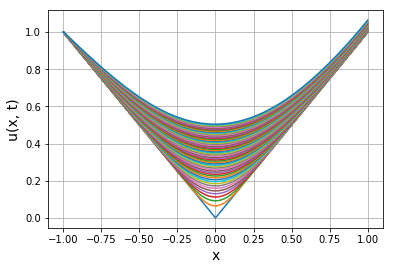

In [64]:
N = 100
h = (b - a) / N
dt = (((b - a) / N) ** 2) / 6

x_row, t_row, A = explicit_1(h, dt)
show_plots(x_row, A)

### 2 способ:


Аппроксимируем граничное условие второго рода с добавлением фиктивных узлов:

$$
\frac{\partial T}{\partial x} = \frac{T_{N + 1}^n - T_{N-1}^n}{2h}
$$

Выражаем фиктивный узел:

$$
T_{N+1}^n = 2h g_2(t) + T_{N-1}^n
$$

Подставив в исходную формулу, получаем:

$$
u(b, t + \tau) = \frac{k \tau}{h^2}u(b-h,t) + (1 - \frac{2k \tau}{h^2})u(b,t) + \frac{k \tau}{h^2}(
2h g_2(t) + T_{N-1}^n) + \tau f(x)
$$

In [67]:
def explicit_2(h, dt):
    nt = int(T / dt) + 1
    nx = int((b - a) / h) + 1
    x_values = np.linspace(a, b, nx)
    t_values = np.linspace(0, t, nt)
    A = np.zeros((nt, nx))
    A[0] = [phi(x) for x in x_values]
    A[:, 0] = [g_1(t) for t in t_values]
    
    for i in range(nt - 1):
        for j in range(1, nx - 1):            
            A[i + 1, j] = k * dt / h ** 2 * A[i, j - 1] + (1 - 2 * k * dt / h ** 2) * A[i, j] + \
                          k * dt / h ** 2 * A[i, j + 1] + dt * f(x_values[j], t_values[i])
        A[i + 1, -1] = k * dt / h ** 2 * A[i, -2] + (1 - 2 * k * dt / h ** 2) * A[i, -1] + k * dt / h ** 2 * \
                        (2 * h * g_2(t_values[i]) + A[i + 1, -2]) + dt * f(x_values[j], t_values[i])
    return x_values, t_values, A

6001


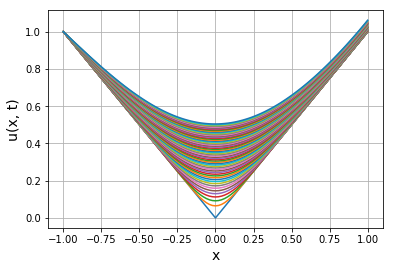

In [68]:
N = 100
h = (b - a) / N
dt = (((b - a) / N) ** 2) / 6

x_row, t_row, A = explicit_2(h, dt)
show_plots(x_row, A)